# HOUSE PRICE PREDICTION 

Dataset infrmation and Url: This dataset is gotten from kaggle. 
here is the URL of the data https://www.kaggle.com/datasets/ebrahimhaquebhatti/pakistan-house-price-prediction/download

Dataset Description: The informatoin caontained in the dataset are attributes of different types of house within some provinces and cities in pakistan. It contains 18 columns and over 160,000 rows.

In [1]:
# import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.linear_model as linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

**Importation and initial view of the**

In [2]:
# import the dataset
housePrice_data = pd.read_csv('./dataset/Entities.csv')
housePrice_data.shape

(168446, 18)

In [3]:
# print the first 5 rows of the dataset
housePrice_data.head() #frist 5 rows

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


from the  displayed information above, it is observed that the dataset contains a lot of columns holding irrelevant information

In [4]:
#Summary of dataset
housePrice_data.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


In [5]:
# to know the types of data contained in this dataset
housePrice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

*the data summarry and type information displayed above gives us a quick insight to the data. We can observe from the information above that some columns contain missing values and our data column is a combination of numeric and objects*

## Data preprocessing and Visualisation

Some of the columns we will be using to train our model contain categorical data types which can not be interpreted by our model, thus we will need to convert them to numerical data. But before converting them, we will quick make a plot of these columns against price to see what can be observed.

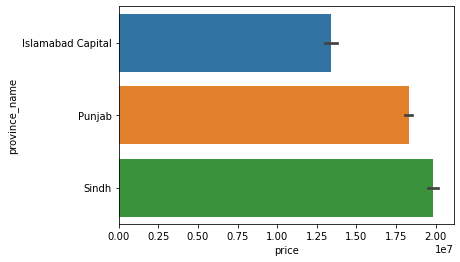

In [6]:
fig = sns.barplot(y="province_name", x="price", data=housePrice_data)

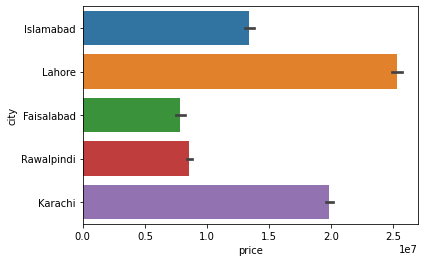

In [7]:
fig = sns.barplot(y="city", x="price", data=housePrice_data)

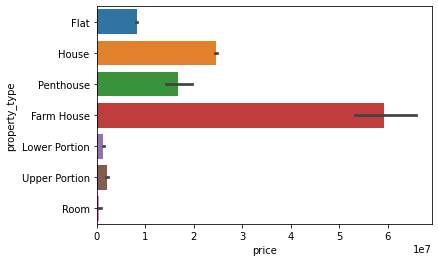

In [8]:
fig = sns.barplot(y="property_type", x="price", data=housePrice_data)

The bar plot of some of the categorical fields against price above shows the most expensive city, province and property type in our data. The top 3 expensive cities are Lahore, Karachi, Islamabad respectively.

From the Property type plot displayed above, we can observe that Farm house is said to be the most expensive type of property to live in these cities.


### Feature Engineering

**Converting Categorical Columns to Numerical Using Dummy Encoding**

The following steps below displays the conversion of city, province_name, purpose and property_type into numerical values using panda get_dummies method.

In [9]:
# find how many categories of cities is available in the dataset
housePrice_data.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

from the result displayed above, we can observe that we have a total of 5 unique city values in our dataset. These categorical values will need to converted to numerical values.

In [10]:
# getting dummy data for each unique value contained in city column
city_dummies = pd.get_dummies(housePrice_data.city)
city_dummies

,Faisalabad,Islamabad,Karachi,Lahore,Rawalpindi
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
168441,0,0,1,0,0
168442,0,0,1,0,0
168443,0,0,1,0,0
168444,0,0,1,0,0


displayed above is the dummy dataframe generated for city column in our dataset. Next we will drop the city column from our dataset while replacing it with the generated dataframe above. 
It is also important we drop one of the dummy data column in other to avoid dummy variable trap.

In [11]:
# merging the dummy data into our original dataset
housePrice_data = pd.concat([housePrice_data, city_dummies], axis='columns')

# dropping one dummy column and city column
housePrice_data = housePrice_data.drop(['city','Rawalpindi'], axis='columns')
housePrice_data

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,province_name,latitude,longitude,...,purpose,bedrooms,date_added,agency,agent,Total_Area,Faisalabad,Islamabad,Karachi,Lahore
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad Capital,33.679890,73.012640,...,For Sale,2,2/4/2019,NaN,NaN,1089.004,0,1,0,0
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad Capital,33.700993,72.971492,...,For Sale,3,5/4/2019,NaN,NaN,15246.056,0,1,0,0
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad Capital,33.631486,72.926559,...,For Sale,5,7/17/2019,NaN,NaN,2178.008,0,1,0,0
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad Capital,33.707573,73.151199,...,For Sale,4,4/5/2019,NaN,NaN,10890.000,0,1,0,0
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad Capital,33.492591,73.301339,...,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Sindh,25.029909,67.137192,...,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096,0,0,1,0
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Sindh,25.017951,67.136393,...,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,2178.008,0,0,1,0
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Sindh,25.015384,67.116330,...,For Sale,6,7/18/2019,Al Shahab Enterprises,Shahmir,26136.096,0,0,1,0
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Sindh,25.013265,67.120818,...,For Sale,3,7/18/2019,Al Shahab Enterprises,Shahmir,21235.578,0,0,1,0


from the dataframe displayed above, it is observed that we have now successfully replaced the city column with the genrated dummy dataframe. 

**Repeating the dummy encoding steps for columns province_name, purpose and property_type**

In [12]:
# Generating and replacing purpose column with dummy data
purpose_dummies = pd.get_dummies(housePrice_data.purpose)
housePrice_data = pd.concat([housePrice_data, purpose_dummies], axis='columns')
housePrice_data = housePrice_data.drop(['purpose','For Sale'], axis='columns')


In [14]:
# Generating and replacing province_name column with dummy data
province_name_dummies = pd.get_dummies(housePrice_data.province_name)
housePrice_data = pd.concat([housePrice_data, province_name_dummies], axis='columns')
housePrice_data = housePrice_data.drop(['province_name','Sindh'], axis='columns')


In [16]:
# Generating and replacing property_type column with dummy data
property_type_dummies = pd.get_dummies(housePrice_data.property_type)
housePrice_data = pd.concat([housePrice_data, property_type_dummies], axis='columns')
housePrice_data = housePrice_data.drop(['property_type','Room'], axis='columns')
housePrice_data

,Unnamed: 0,property_id,location_id,page_url,price,location,latitude,longitude,baths,bedrooms,...,Lahore,For Rent,Islamabad Capital,Punjab,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,10000000,G-10,33.679890,73.012640,2,2,...,0,0,1,0,0,1,0,0,0,0
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,6900000,E-11,33.700993,72.971492,3,3,...,0,0,1,0,0,1,0,0,0,0
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,16500000,G-15,33.631486,72.926559,6,5,...,0,0,1,0,0,0,1,0,0,0
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,43500000,Bani Gala,33.707573,73.151199,4,4,...,0,0,1,0,0,0,1,0,0,0
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,7000000,DHA Defence,33.492591,73.301339,3,3,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,26500000,Gadap Town,25.029909,67.137192,0,6,...,0,0,0,0,0,0,1,0,0,0
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,12500000,Gadap Town,25.017951,67.136393,0,3,...,0,0,0,0,0,0,1,0,0,0
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,27000000,Gadap Town,25.015384,67.116330,0,6,...,0,0,0,0,0,0,1,0,0,0
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,11000000,Gadap Town,25.013265,67.120818,0,3,...,0,0,0,0,0,0,1,0,0,0


All categorical data have now been successfuly replace with numerical dataframe thereby increasing the number of columns in our dataset to 27

In [18]:
# sum all null counts for each row
housePrice_data.isnull().sum()

Unnamed: 0               0
property_id              0
location_id              0
page_url                 0
price                    0
location                 0
latitude                 0
longitude                0
baths                    0
bedrooms                 0
date_added               0
agency               44071
agent                44072
Total_Area               0
Faisalabad               0
Islamabad                0
Karachi                  0
Lahore                   0
For Rent                 0
Islamabad Capital        0
Punjab                   0
Farm House               0
Flat                     0
House                    0
Lower Portion            0
Penthouse                0
Upper Portion            0
dtype: int64

From the above informaton displayed, we can observe that most of our columns do not contain missing data except angency and agent columns. This is not a problem since we will be dropping these columns.

**Feature Selection**

In [19]:
# drop unwanted columns
housePrice_data.drop(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'location', 'latitude', 'longitude',
        'date_added', 'agency', 'agent',
       ], inplace=True, axis=1)
housePrice_data.head()

,price,baths,bedrooms,Total_Area,Faisalabad,Islamabad,Karachi,Lahore,For Rent,Islamabad Capital,Punjab,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
0,10000000,2,2,1089.004,0,1,0,0,0,1,0,0,1,0,0,0,0
1,6900000,3,3,15246.056,0,1,0,0,0,1,0,0,1,0,0,0,0
2,16500000,6,5,2178.008,0,1,0,0,0,1,0,0,0,1,0,0,0
3,43500000,4,4,10890.000,0,1,0,0,0,1,0,0,0,1,0,0,0
4,7000000,3,3,2178.008,0,1,0,0,0,1,0,0,0,1,0,0,0


In [20]:
# Checking for a quick summary of our data
housePrice_data.describe()

,price,baths,bedrooms,Total_Area,Faisalabad,Islamabad,Karachi,Lahore,For Rent,Islamabad Capital,Punjab,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.776576e+07,2.874227,3.179422,1.394239e+04,0.048283,0.222184,0.359071,0.245936,0.283717,0.222184,0.418745,0.003900,0.227004,0.626124,0.054789,0.002345,0.081771
std,3.531003e+07,2.463400,1.971401,8.623647e+05,0.214363,0.415715,0.479729,0.430642,0.450802,0.415715,0.493355,0.062331,0.418897,0.483833,0.227569,0.048368,0.274016
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000e+05,0.000000,2.000000,1.905757e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.500000e+06,3.000000,3.000000,4.356016e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.950000e+07,4.000000,4.000000,1.197904e+04,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000e+09,403.000000,68.000000,3.387988e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are some outliers contained in some columns of our dataset. these needs to be removed to avoid skewing of our model.

**Removing Outliers**

From the describe table displayed above, we can observe some unrealistic data in some of our columns. for example looking at the **Min** row, there are records contain 0 bedrooms, 0 bathrooms and 0 area. These are not realistic values for building and hence needs to be removed.

In [21]:
# cleaning our dataset columns (baths, bedrooms and Total_Area) off 0 value.
housePrice_data = housePrice_data[housePrice_data.baths != 0 ]
housePrice_data = housePrice_data[housePrice_data.bedrooms != 0]
housePrice_data = housePrice_data[housePrice_data.Total_Area != 0]

In [22]:
housePrice_data.describe()

,price,baths,bedrooms,Total_Area,Faisalabad,Islamabad,Karachi,Lahore,For Rent,Islamabad Capital,Punjab,Farm House,Flat,House,Lower Portion,Penthouse,Upper Portion
count,1.256130e+05,125613.000000,125613.000000,1.256130e+05,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000,125613.000000
mean,1.807518e+07,3.843424,3.669357,1.191990e+04,0.020149,0.222039,0.378177,0.271461,0.261549,0.222039,0.399783,0.001887,0.242324,0.626997,0.047885,0.002325,0.074833
std,3.350061e+07,2.096968,1.602922,2.875648e+05,0.140511,0.415619,0.484934,0.444715,0.439480,0.415619,0.489856,0.043396,0.428491,0.483605,0.213524,0.048158,0.263123
min,1.000000e+00,1.000000,1.000000,2.722510e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000e+05,3.000000,3.000000,1.905757e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.200000e+06,3.000000,3.000000,4.356016e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000e+07,5.000000,5.000000,1.143454e+04,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000e+09,403.000000,18.000000,9.377379e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


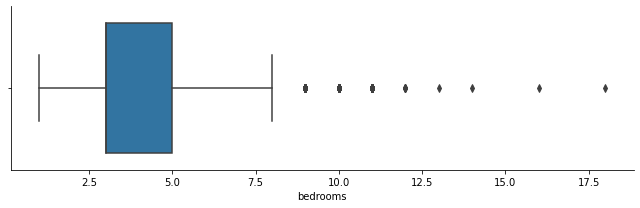

In [23]:
# making a box plot of bedrooms column in our dataset
sns.catplot(x='bedrooms', data=housePrice_data, kind='box', height=3, aspect=3)

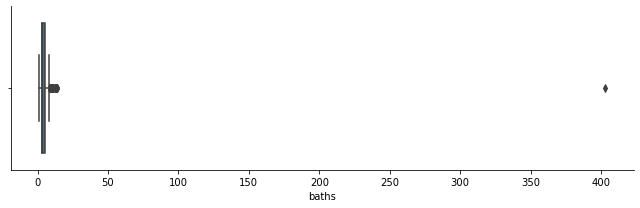

In [24]:
# making a box plot of baths column in our dataset
sns.catplot(x='baths', data=housePrice_data, kind='box', height=3, aspect=3)

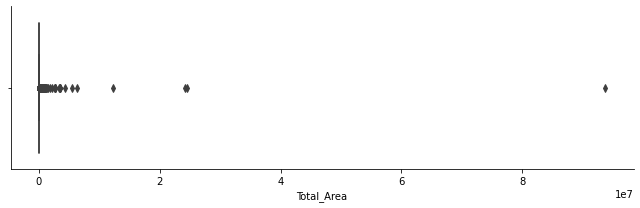

In [25]:
# making a box plot of Total_Area column in our dataset
sns.catplot(x='Total_Area', data=housePrice_data, kind='box', height=3, aspect=3)

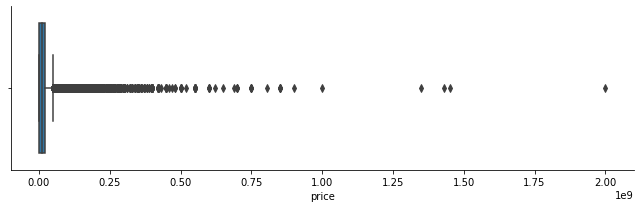

In [26]:
# making a box plot of price column in our dataset
sns.catplot(x='price', data=housePrice_data, kind='box', height=3, aspect=3)

There are alot of outliers observed beyond the thrid quantile (Q3) of the box plot displayed above.

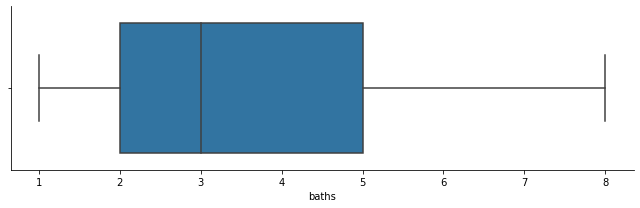

In [27]:
# removing outliers from price, baths, bedrooms and total_area columns
cols = ['price','baths','bedrooms','Total_Area']
def removeOutliers(cols):
    Q1 = housePrice_data[cols].quantile(0.25)
    Q3 = housePrice_data[cols].quantile(0.75)
    IQR = Q3 - Q1

    df = housePrice_data[~((housePrice_data[cols] < (Q1 - 1.5 * IQR)) |(housePrice_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df
housePrice_data = removeOutliers(cols)
sns.catplot(x='baths', data=housePrice_data, kind='box', height=3, aspect=3)


<AxesSubplot:>

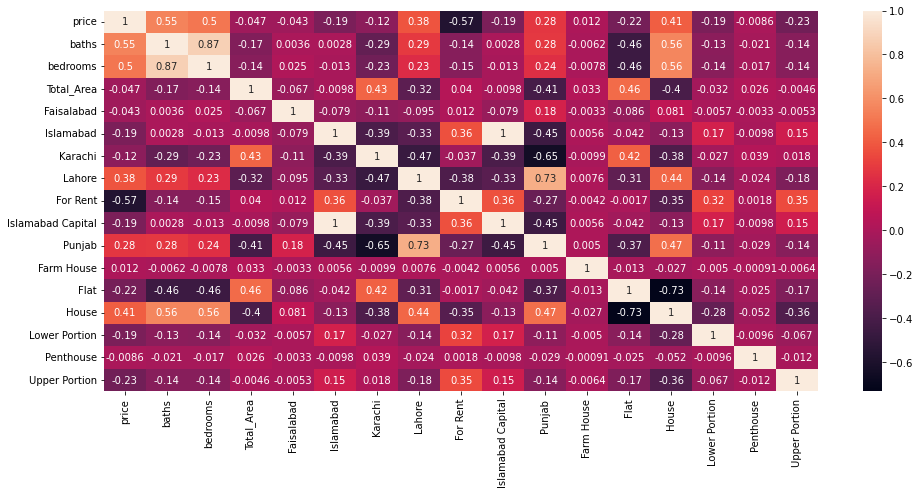

In [28]:
cor_matrx = housePrice_data.corr()
fig, axix = plt.subplots(figsize = (16,7))
sns.heatmap(cor_matrx, annot = True)

<AxesSubplot:>

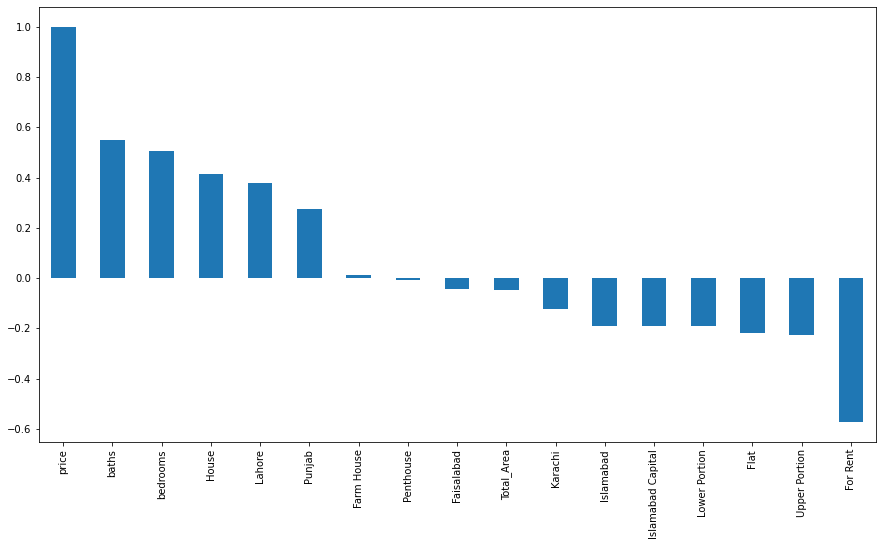

In [48]:
plt.figure(figsize=(15,8))
housePrice_data.corr()['price'].sort_values(ascending = False).plot(kind='bar')

We can observe a correlation between price and some columns in our data above the matrix displayed above

View Price against some columns.

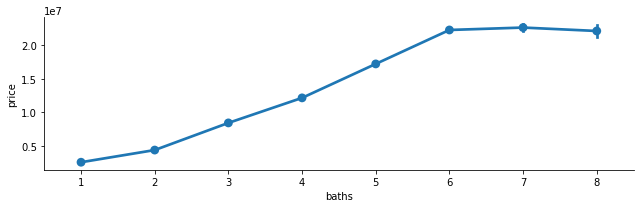

In [46]:
# making a plot of price against bathrooms
sns.catplot(x='baths', y='price', data=housePrice_data, kind='point', height=3, aspect=3)

from the plot of Price X Baths, we can observe a slight increase in price with increase in bathrooms. 

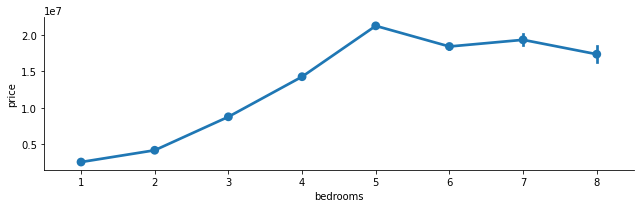

In [47]:
# making a plot of price against bedrooms
sns.catplot(x='bedrooms', y='price', data=housePrice_data, kind='point', height=3, aspect=3)

from our scatter plot above, number of bedrooms can also infleence the price of an apartment

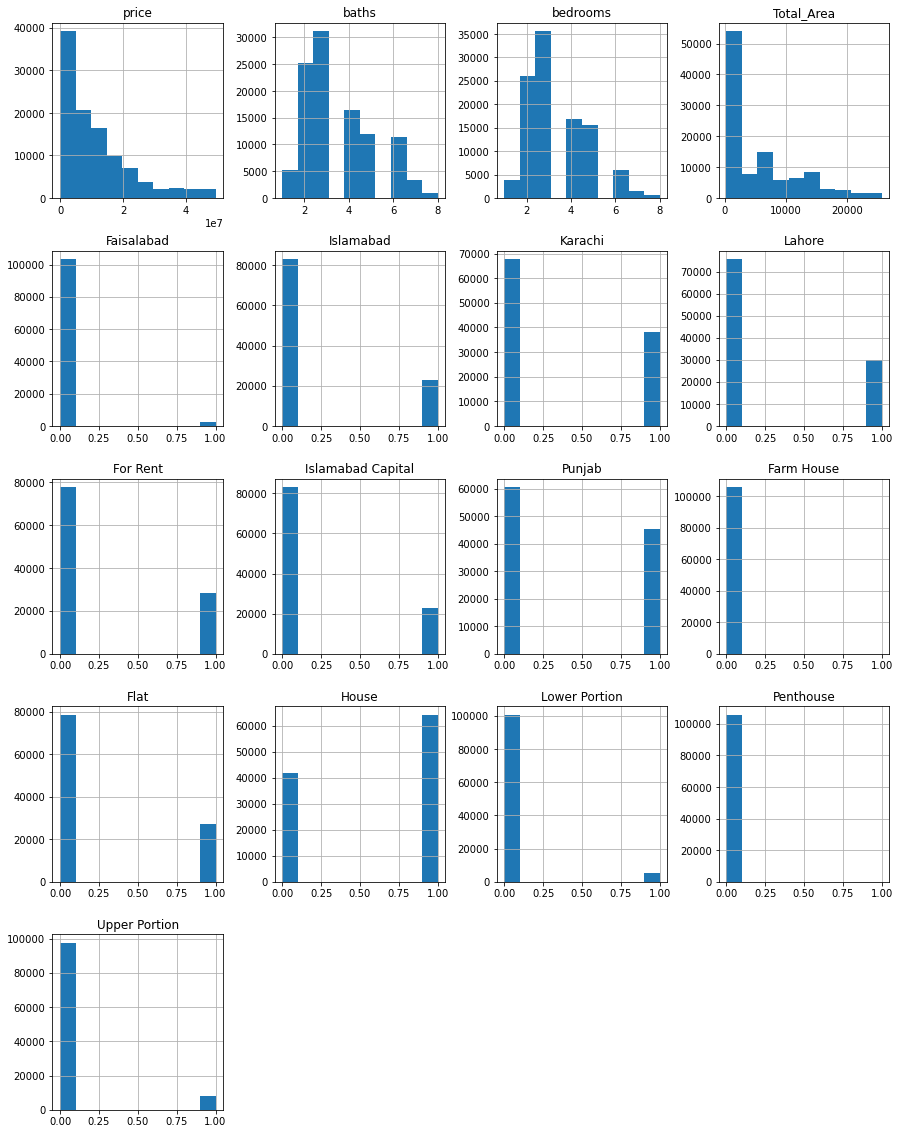

In [31]:
# histogram plot of columns in our data
%matplotlib inline
# import matplotlib.pyplot as plt
housePrice_data.hist(figsize=(15,20))
plt.show()

## Analysis

All outliers, null values and irrelevant columns have been dropped and our data is ready for fitting. We will now split our data into train (for training our model) and test (for validating our model's prediction accurracy) categories. 

In [32]:
# spliting the data into dependent and independent sets
X = housePrice_data.drop('price', axis=1)
y = housePrice_data['price']

In [33]:
# splitting the data into test ans train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

**Linear Regression**

In [34]:
# train model
linearRegress = linear_model.LinearRegression()
linearRegress.fit(X_train, y_train)
y_predict =  linearRegress.predict(X_test);
print("R2 Score", metrics.r2_score(y_test, y_predict))
print("MAE", metrics.mean_absolute_error(y_test, y_predict))
mse = metrics.mean_squared_error(y_test, y_predict);
print("MSE", mse)
print("RMSE", np.sqrt(mse))

R2 Score 0.567452183701663
MAE 5416503.457682504
MSE 55484214680027.58
RMSE 7448772.696225035


**Gradient Boosting Regressor**

In [35]:

gbRegressor = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=1, random_state=31).fit(X_train, y_train)
cv_r2 = cross_val_score(gbRegressor, X_train, y_train, cv=10)
y_predict = gbRegressor.predict(X_test)
print("R2 Score", metrics.r2_score(y_test, y_predict))
print("MAE", metrics.mean_absolute_error(y_test, y_predict))
mse = metrics.mean_squared_error(y_test, y_predict);
print("MSE", mse)
print("RMSE", np.sqrt(mse))

R2 Score 0.6150350833378381
MAE 5017922.460203106
MSE 49380612444544.75
RMSE 7027134.013560916


**Random Forest Regressor**

In [36]:
rF = RandomForestRegressor()
rF.fit(X_train, y_train)
y_predict = rF.predict(X_test)

print("R2 Score", metrics.r2_score(y_test, y_predict))
print("MAE", metrics.mean_absolute_error(y_test, y_predict))
mse = metrics.mean_squared_error(y_test, y_predict);
print("MSE", mse)
print("RMSE", np.sqrt(mse))

R2 Score 0.8542371955344152
MAE 2427940.6219349895
MSE 18697435128774.88
RMSE 4324053.090420477


**Decision Tree Regressor**

In [37]:

d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
y_predict = d_tree.predict(X_test)
print("R2 Score", metrics.r2_score(y_test, y_predict))
print("MAE", metrics.mean_absolute_error(y_test, y_predict))
mse = metrics.mean_squared_error(y_test, y_predict);
print("MSE", mse)
print("RMSE", np.sqrt(mse))

R2 Score 0.846858642498275
MAE 2456014.0330584175
MSE 19643904409763.69
RMSE 4432144.4482060475
